# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [2]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [4]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T13:01:29+0300',
 'created_at': '2023-03-01T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [5]:
data['found']

260

Количество страниц в результатах поиска

In [6]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [7]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,None,None,2023-03-03T16:06:49+0300,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [9]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [10]:
URL = 'https://api.hh.ru/vacancies'
jobs = pd.DataFrame([])
search = ['"Аналитик Данных" OR "Data Analyst" OR "Data Scientist" ', '"Data Engineer" OR "Аналитик" OR "Инженер Данных" OR "Дата Инженер" OR "Машинное обучение" OR "Нейронные сети"']
for i in search:
    number = 0
    while 1:
        params = {
            'text': i,
            'area': 1,
            'page': number,
            'per_page': 10
        }
        number += 1
        req = requests.get(URL, params)
        data = json.loads(req.content.decode())
        if not 'items' in data.keys():
            break
        data = pd.json_normalize(data['items'])
        jobs = pd.concat([data, jobs], ignore_index = True)
        sleep(0.5)

In [11]:
display(jobs)

,id,premium,name,department,has_test,response_letter_required,salary,response_url,sort_point_distance,published_at,...,salary.from,salary.to,salary.currency,salary.gross,employer.logo_urls,department.id,department.name,address.metro,insider_interview.id,insider_interview.url
0,77204893,False,Аналитик-консультант 1С,NaN,False,False,NaN,None,None,2023-03-01T11:23:26+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73498391,False,Аналитик на маркетплейсы,NaN,False,False,NaN,None,None,2023-02-28T21:02:12+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77120645,False,Системный аналитик бизнес-процессов,NaN,False,False,NaN,None,None,2023-03-01T10:59:37+0300,...,200000.0,NaN,RUR,True,NaN,NaN,NaN,NaN,NaN,NaN
3,76958190,False,Менеджер-аналитик по маркетплейсам,NaN,False,False,NaN,None,None,2023-03-01T10:48:19+0300,...,NaN,100000.0,RUR,False,NaN,NaN,NaN,NaN,NaN,NaN
4,77526437,False,Категорийный менеджер / аналитик маркетплейсов,NaN,False,False,NaN,None,None,2023-03-01T10:04:46+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,77075807,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-03T13:58:00+0300,...,NaN,NaN,NaN,NaN,NaN,7172-7172-it,"Лента, федеральная розничная сеть, IT",NaN,NaN,NaN
2948,75920088,False,Lead Data Scientist,NaN,False,False,NaN,None,None,2023-03-03T19:05:51+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2949,75619237,False,Senior data scientist,NaN,False,False,NaN,None,None,2023-03-03T17:48:28+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2950,77656158,False,Data Scientist Intern,NaN,False,False,NaN,None,None,2023-03-03T16:06:49+0300,...,40000.0,50000.0,RUR,True,NaN,NaN,NaN,NaN,NaN,NaN


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [12]:
jobs = jobs.drop_duplicates(subset = 'id', ignore_index = True)
display(jobs)

,id,premium,name,department,has_test,response_letter_required,salary,response_url,sort_point_distance,published_at,...,salary.from,salary.to,salary.currency,salary.gross,employer.logo_urls,department.id,department.name,address.metro,insider_interview.id,insider_interview.url
0,77204893,False,Аналитик-консультант 1С,NaN,False,False,NaN,None,None,2023-03-01T11:23:26+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73498391,False,Аналитик на маркетплейсы,NaN,False,False,NaN,None,None,2023-02-28T21:02:12+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77120645,False,Системный аналитик бизнес-процессов,NaN,False,False,NaN,None,None,2023-03-01T10:59:37+0300,...,200000.0,NaN,RUR,True,NaN,NaN,NaN,NaN,NaN,NaN
3,76958190,False,Менеджер-аналитик по маркетплейсам,NaN,False,False,NaN,None,None,2023-03-01T10:48:19+0300,...,NaN,100000.0,RUR,False,NaN,NaN,NaN,NaN,NaN,NaN
4,77526437,False,Категорийный менеджер / аналитик маркетплейсов,NaN,False,False,NaN,None,None,2023-03-01T10:04:46+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,76925483,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-03T14:31:00+0300,...,160000.0,200000.0,RUR,False,NaN,NaN,NaN,NaN,NaN,NaN
2771,77075807,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-03T13:58:00+0300,...,NaN,NaN,NaN,NaN,NaN,7172-7172-it,"Лента, федеральная розничная сеть, IT",NaN,NaN,NaN
2772,75920088,False,Lead Data Scientist,NaN,False,False,NaN,None,None,2023-03-03T19:05:51+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2773,75619237,False,Senior data scientist,NaN,False,False,NaN,None,None,2023-03-03T17:48:28+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

Можно добавить только те данные, которые реально ключевые во время поиска работы.

In [13]:
table = pd.DataFrame(columns=['id', 'key_skills', 'salary.from', 'salary.to', 'schedule.id', 'salary.currency'])
for i in jobs['id']:
    vacancy_url = f'https://api.hh.ru/vacancies/{i}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    vacancy_info = pd.json_normalize(vacancy_info)
    table = pd.concat([table, vacancy_info], ignore_index = True)
    sleep(0.5)

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table = pd.concat([table, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/160295404.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly 

KeyboardInterrupt: 

In [14]:
table = table[['id', 'key_skills', 'salary.from', 'salary.to', 'schedule.name', 'department.name', 'salary.currency']]
display(table)

,id,key_skills,salary.from,salary.to,schedule.name,department.name,salary.currency
0,77204893,[],NaN,NaN,Полный день,NaN,NaN
1,73498391,"[{'name': 'Power Query'}, {'name': 'Power Pivo...",NaN,NaN,Полный день,NaN,NaN
2,77120645,[],200000,None,Гибкий график,NaN,RUR
3,76958190,"[{'name': 'Аналитическое мышление'}, {'name': ...",None,100000,Полный день,NaN,RUR
4,77526437,[{'name': 'Продажи'}],NaN,NaN,Полный день,NaN,NaN
...,...,...,...,...,...,...,...
1723,76520209,"[{'name': 'BPMN'}, {'name': 'Аналитическое мыш...",NaN,NaN,Полный день,NaN,NaN
1724,76913103,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",100000,None,Удаленная работа,NaN,RUR
1725,77637379,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",NaN,NaN,Полный день,NaN,NaN
1726,77665788,"[{'name': 'Аналитическое мышление'}, {'name': ...",NaN,NaN,Полный день,NaN,NaN


**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [15]:
table.to_excel('table.xlsx')

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [16]:
table['id'].size

1728

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [17]:
supreme = {}
for new_table in table.key_skills:
    for skills in new_table:
        if skills['name'] in supreme:
            supreme[skills['name']] += 1
        else:
            supreme[skills['name']] = 1
    
# Сортировка всех скиллов
prior_skill = {}
prior_point = sorted(supreme, key = supreme.get, reverse = True)
for skills in prior_point:
    prior_skill[skills] = supreme[skills]

pd.DataFrame.from_dict(data=prior_skill, orient = 'index').head(15).reset_index(drop = False)

,index,0
0,SQL,423
1,Аналитическое мышление,291
2,BPMN,208
3,Бизнес-анализ,185
4,Анализ данных,184
5,Python,173
6,UML,169
7,MS PowerPoint,161
8,Системный анализ,148
9,Работа с большим объемом информации,131


ИСследование показало, что наиболее важные навыки для Data Scientist'ов - Python и SQL. Ну понятно, что основной язык анализа данных это python, и соответственно SQL для работы с базами данных и для СУБД.

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Ниже, код выполняет роль "сортировщика". То есть, у нас есть таблица с данными, и мы акцентируем внимание только на зарплате. В изначальной таблице нет колонки с название "Salary", соответственно, применяя колонки salary.from и salary.to, можно посчитать их среднюю арифметическую и принимать как привычная зарплата. В качестве зарплаты можно было взять salary.from, но чтобы получить больше данных взяли и верхнюю часть зарплаты.

In [18]:
salary_new = table.copy()
salary_new = salary_new[['id', 'salary.from', 'salary.to','salary.currency', 'department.name']]
# rate = {'USD':75.26, 'EUR':80.18, 'RUR': 1} на момент 01.03.2023 09:57pm
for i in range(salary_new.shape[0]):
    salary_new['salary'] = (salary_new['salary.from'] + salary_new['salary.to']) / 2
    if salary_new['salary.currency'][i] == 'EUR':
        salary_new['salary'] *= 80.18
    if salary_new['salary.currency'][i] == 'USD':
        salary_new['salary'] *= 75.26

In [19]:
salary_new

,id,salary.from,salary.to,salary.currency,department.name,salary
0,77204893,NaN,NaN,NaN,NaN,NaN
1,73498391,NaN,NaN,NaN,NaN,NaN
2,77120645,200000,None,RUR,NaN,NaN
3,76958190,None,100000,RUR,NaN,NaN
4,77526437,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1723,76520209,NaN,NaN,NaN,NaN,NaN
1724,76913103,100000,None,RUR,NaN,NaN
1725,77637379,NaN,NaN,NaN,NaN,NaN
1726,77665788,NaN,NaN,NaN,NaN,NaN


(0.0, 350000.0)

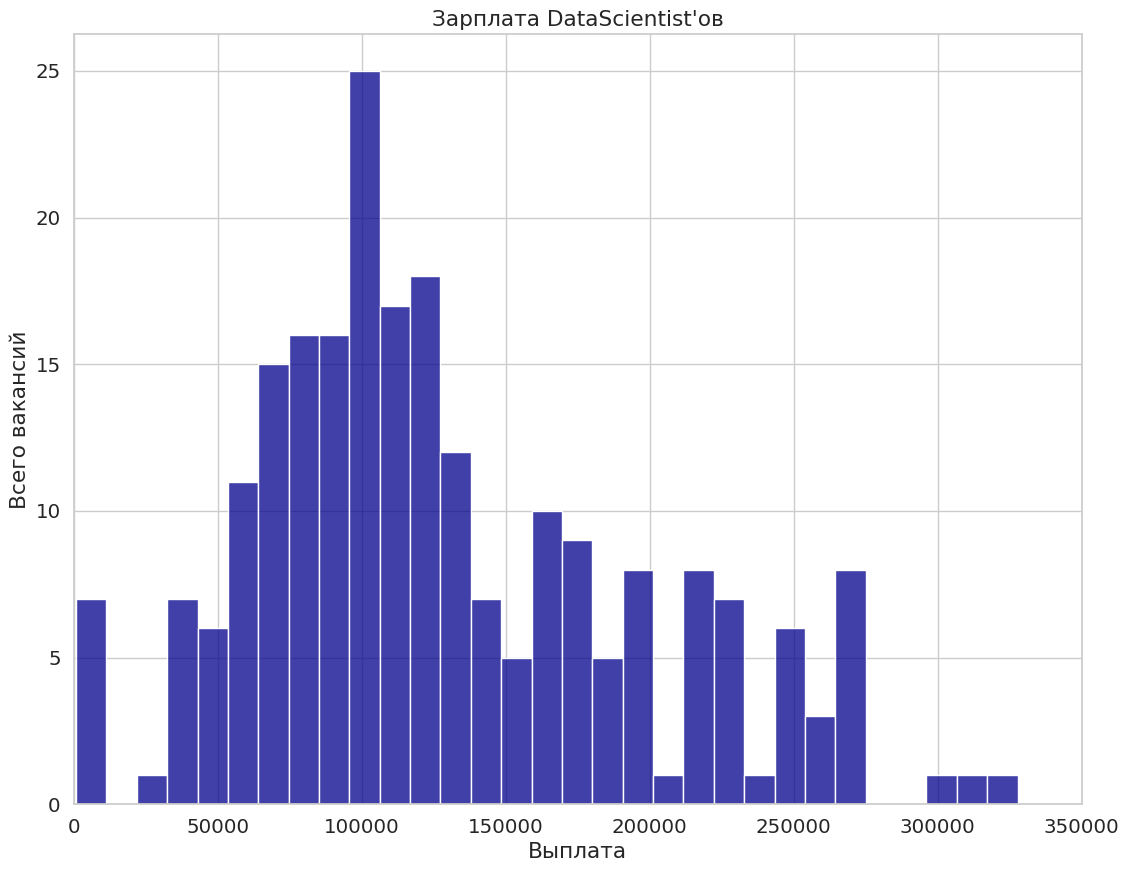

In [21]:
plt.figure(figsize = (13, 10))
sns.histplot(data = salary_new['salary'], color = 'darkblue', bins = 35, multiple = "stack")
plt.xlabel("Выплата")
plt.ylabel("Всего вакансий")
plt.title("Зарплата DataScientist'ов")
plt.xlim((0, 350000))

Мы понимаем, что зарплаты могут быть и довольно выше, но выше 300 - 400 тысячи можно и не включать в наше исследование, так как такая зарплата - редкость. В основном, зарплата варьируется от 100 до 250 тысячи в зависисмости от должности и рабочего графика и других ключевих факторов, например работадатель.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Будем искать вакансий для разработчиков.

In [22]:
URL = 'https://api.hh.ru/vacancies'
jobs_2 = pd.DataFrame([])
search_2 = ['"С/С++ Разработчик" OR "Разработчик" ', '"Software Developer" OR "Java" OR "Системное программирование" OR "С/С++"']
for i in search_2:
    number = 0
    while 1:
        params = {
            'text': i,
            'area': 1,
            'page': number,
            'per_page': 10
        }
        number += 1
        req = requests.get(URL, params)
        data = json.loads(req.content.decode())
        if not 'items' in data.keys():
            break
        data = pd.json_normalize(data['items'])
        jobs_2 = pd.concat([data, jobs], ignore_index = True)
        sleep(0.5)

In [25]:
# Удаление дубликатов
jobs_2 = jobs_2.drop_duplicates(subset = 'id', ignore_index = True)
display(jobs_2)

,id,premium,name,department,has_test,response_letter_required,salary,response_url,sort_point_distance,published_at,...,address,salary.from,salary.to,salary.currency,salary.gross,department.id,department.name,employer.logo_urls,insider_interview.id,insider_interview.url
0,76867408,False,Инженер средств СЗИ,NaN,False,False,NaN,None,None,2023-03-03T17:20:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76474692,False,Инженер по автоматизированному тестированию (Q...,NaN,False,False,NaN,None,None,2023-03-03T08:00:06+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77095137,False,Anti-fraud Analyst,NaN,False,False,NaN,None,None,2023-03-03T19:52:05+0300,...,NaN,3000.0,NaN,USD,False,NaN,NaN,NaN,NaN,NaN
3,76484671,False,Ведущий разработчик бэкенда в команду диагностики,NaN,False,False,NaN,None,None,2023-03-03T11:18:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77618662,False,Системный администратор (mac),NaN,False,False,NaN,None,None,2023-03-02T20:19:20+0300,...,NaN,NaN,NaN,NaN,NaN,mailru-15478-other,VK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,76925483,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-03T14:31:00+0300,...,NaN,160000.0,200000.0,RUR,False,NaN,NaN,NaN,NaN,NaN
2779,77075807,False,Data Scientist,NaN,False,False,NaN,None,None,2023-03-03T13:58:00+0300,...,NaN,NaN,NaN,NaN,NaN,7172-7172-it,"Лента, федеральная розничная сеть, IT",NaN,NaN,NaN
2780,75920088,False,Lead Data Scientist,NaN,False,False,NaN,None,None,2023-03-03T19:05:51+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2781,75619237,False,Senior data scientist,NaN,False,False,NaN,None,None,2023-03-03T17:48:28+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Снова можно создать удобную таблицу для дальнейших исследований
table_2 = pd.DataFrame(columns=['id', 'key_skills', 'salary.from', 'salary.to', 'schedule.name', 'salary.currency', 'address.metro_stations', 'experience.name'])
for i in jobs['id']:
    vacancy_url = f'https://api.hh.ru/vacancies/{i}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    vacancy_info = pd.json_normalize(vacancy_info)
    table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
    sleep(0.5)

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  table_2 = pd.concat([table_2, vacancy_info], ignore_index = True)
/tmp/ipykernel_4805/3633707476.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=T

KeyboardInterrupt: 

In [28]:
table_2 = table_2[['id', 'key_skills', 'salary.from', 'salary.to', 'schedule.name', 'salary.currency']]
display(table_2)

,id,key_skills,salary.from,salary.to,schedule.name,salary.currency
0,77204893,[],NaN,NaN,Полный день,NaN
1,73498391,"[{'name': 'Power Query'}, {'name': 'Power Pivo...",NaN,NaN,Полный день,NaN
2,77120645,[],200000,None,Гибкий график,RUR
3,76958190,"[{'name': 'Аналитическое мышление'}, {'name': ...",None,100000,Полный день,RUR
4,77526437,[{'name': 'Продажи'}],NaN,NaN,Полный день,NaN
...,...,...,...,...,...,...
1565,70889797,"[{'name': 'XML'}, {'name': 'UML'}, {'name': 'B...",NaN,NaN,Полный день,NaN
1566,77589296,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",70000,90000,Полный день,RUR
1567,75982606,[],NaN,NaN,Полный день,NaN
1568,76717085,"[{'name': '1С: Управление Торговлей'}, {'name'...",75000,100000,Удаленная работа,RUR


Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.

In [29]:
table_2.to_excel('table_2.xlsx')

Вопрос 1. Сколько сейчас доступно вакансий по вашему запросу?

In [31]:
table_2.id.size

1570

Вопрос 2. Какие навыки чаще всего встречаются в вакансиях по данной специальности?
Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте 
его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную 
информацию по топ-15 навыков.

In [37]:
supreme_2 = {}
for new_table in table_2.key_skills:
    for skills in new_table:
        if skills['name'] in supreme_2:
            supreme_2[skills['name']] += 1
        else:
            supreme_2[skills['name']] = 1
    
# Сортировка всех скиллов
prior_skill_2 = {}
prior_point_2 = sorted(supreme_2, key = supreme_2.get, reverse = True)
for skills in prior_point_2:
    prior_skill_2[skills] = supreme_2[skills]

pd.DataFrame.from_dict(data=prior_skill_2, orient = 'index').head(15).reset_index(drop = False)

,index,0
0,SQL,391
1,Аналитическое мышление,260
2,BPMN,183
3,Бизнес-анализ,169
4,Анализ данных,168
5,Python,161
6,UML,149
7,MS PowerPoint,149
8,Системный анализ,131
9,Работа с большим объемом информации,118


In [41]:
# аналогичный код, чтобы посчитать зарплату для разработчиков
salary_new_2 = table.copy()
salary_new_2 = salary_new_2[['id', 'salary.from', 'salary.to','salary.currency', 'department.name']]
# rate = {'USD':75.26, 'EUR':80.18, 'RUR': 1} на момент 01.03.2023 09:57pm
for i in range(salary_new_2.shape[0]):
    salary_new_2['salary'] = (salary_new_2['salary.from'] + salary_new_2['salary.to']) / 2
    if salary_new_2['salary.currency'][i] == 'EUR':
        salary_new_2['salary'] *= 80.18
    if salary_new_2['salary.currency'][i] == 'USD':
        salary_new_2['salary'] *= 75.26
display(salary_new_2)

,id,salary.from,salary.to,salary.currency,department.name,salary
0,77204893,NaN,NaN,NaN,NaN,NaN
1,73498391,NaN,NaN,NaN,NaN,NaN
2,77120645,200000,None,RUR,NaN,NaN
3,76958190,None,100000,RUR,NaN,NaN
4,77526437,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1758,76455135,NaN,NaN,NaN,NaN,NaN
1759,76551106,NaN,NaN,NaN,NaN,NaN
1760,77598458,NaN,NaN,NaN,NaN,NaN
1761,77542276,NaN,NaN,NaN,NaN,NaN


(0.0, 350000.0)

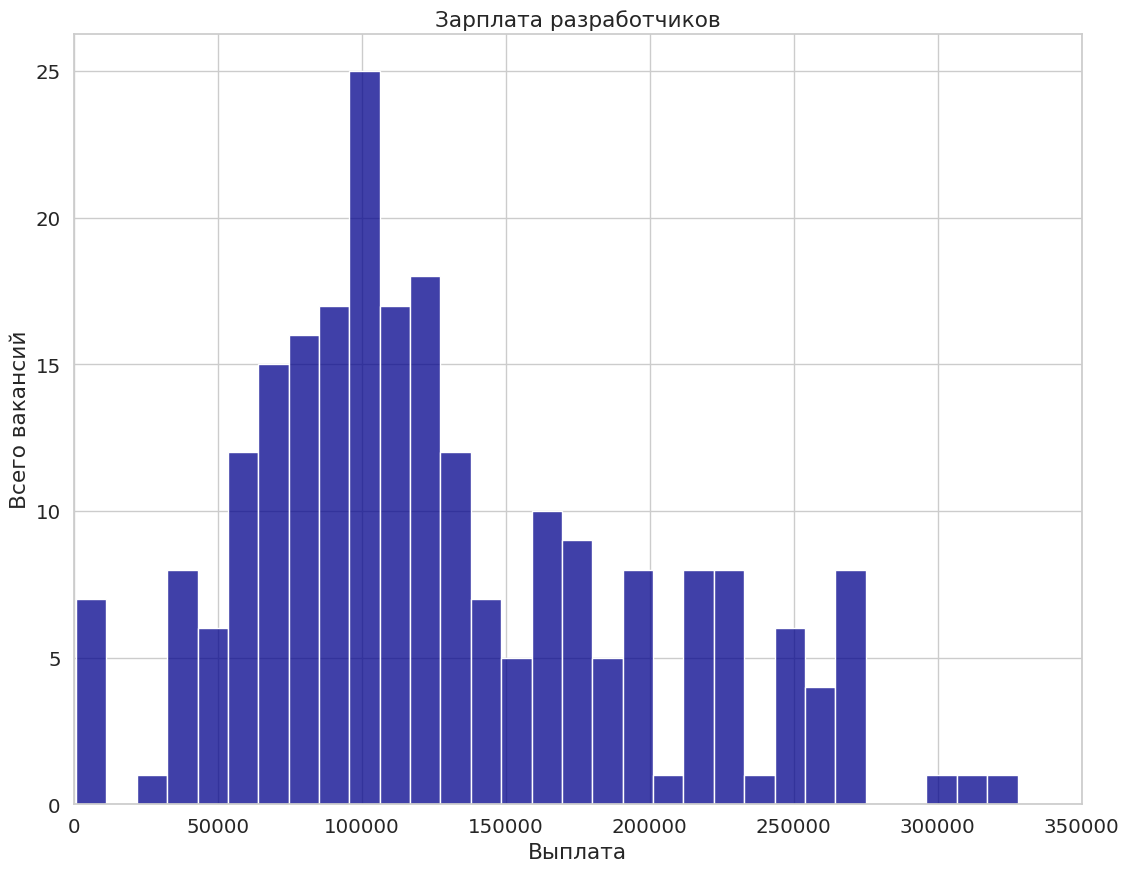

In [43]:
# Построение гистограммы зарплат для разработчиков
plt.figure(figsize = (13, 10))
sns.histplot(data = salary_new_2['salary'], color = 'darkblue', bins = 35, multiple = "stack")
plt.xlabel("Выплата")
plt.ylabel("Всего вакансий")
plt.title("Зарплата разработчиков")
plt.xlim((0, 350000))

Не забывайте про выводы.

Исследование двух профессий показало, что для аналитиков ключевыми навыками являются Python и SQL. Наиболее важными для аналитиков,кроме Hard skills оказались и Soft skills и личные качества. Так как работа аналитика не только написание кода и думать о структуре, но и умение работать в команде, убеждать и правильно донести информацию.

Разработчик - слово с обширным значением в данный момент, поэтому для простоты обойдемся, что если не интересует работа аналитика, то востребованным навыком чтобы искать вакансию для  разработчика - знание Java.
В обоих случаях зарплаты примерно одинаковые, так как выбранные профессии оба из области IT.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


Далее, исследование ведется с данными, которые были получены с Data Scientist'ами.

Вопрос первый: Какой опыт требуется для данной вакансии?

In [75]:
experience = table.copy()
experience = experience[['experience.name']]

In [98]:
table.groupby(by='experience.name').count().sort_values(by='key_skills', ascending = False).head()

,id,key_skills,salary.from,salary.to,schedule.name,department.name,salary.currency,premium,relations,name,...,employer.logo_urls.90,employer.logo_urls.240,employer.vacancies_url,employer.trusted,address,salary.gross,employer.logo_urls,department.id,test.required,address.metro
experience.name,,,,,,,,,,,,,,,,,,,,,
От 1 года до 3 лет,18,18,5,4,18,4,6,18,18,18,...,15,15,18,18,0,6,0,4,3,0
От 3 до 6 лет,14,14,4,2,14,0,5,14,14,14,...,12,12,14,14,0,5,0,0,1,0
Нет опыта,3,3,1,1,3,0,1,3,3,3,...,3,3,3,3,0,1,0,0,0,0


В основном, требуемый опыт --- от 1 до 3 лет, конкурирует с ним и от 1 до 6.

Вопрос второй: Какие работодатели в топе?

In [97]:
table.groupby(by='department.name').count().sort_values(by='key_skills', ascending = False).head(15)

,id,key_skills,salary.from,salary.to,schedule.name,salary.currency,premium,relations,name,insider_interview,...,employer.logo_urls.90,employer.logo_urls.240,employer.vacancies_url,employer.trusted,address,salary.gross,employer.logo_urls,department.id,test.required,address.metro
department.name,,,,,,,,,,,,,,,,,,,,,
Сбер для экспертов,23,23,0,0,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"билайн: ИТ, Data, Digital",17,17,0,1,17,1,1,1,1,0,...,1,1,1,1,0,0,0,1,0,0
Сбер. IT,13,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Альфа-Банк,11,11,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
«МТС»,9,9,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VK,7,7,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
«РОСБАНК»,7,7,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ПИК,6,6,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"«МТС», IT",6,6,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Самые топовые работадатели для Data Scientist'ов - Сбер, Билайн, Альфа-Банк, МТС, ВК, ВТБ и прочие. Термин топ - очень широкое, поэтому, автор решения, определил топ как наибольшее количество вакансий по этой профессии. Можно было включать и другие важные факторы как количество сотрудников, или зарплата и прочее.

Вопрос третий: В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

In [129]:
table.groupby(by='address.metro.station_name').count().sort_values(by='id', ascending = False).head(15)

,id,key_skills,salary.from,salary.to,schedule.name,department.name,salary.currency,premium,relations,name,...,employer.logo_urls.90,employer.logo_urls.240,employer.vacancies_url,employer.trusted,address,salary.gross,employer.logo_urls,department.id,test.required,address.metro
address.metro.station_name,,,,,,,,,,,,,,,,,,,,,
Аэропорт,2,2,0,0,2,1,0,2,2,2,...,2,2,2,2,0,0,0,1,0,0
Павелецкая,2,2,0,0,2,0,0,2,2,2,...,2,2,2,2,0,0,0,0,0,0
Белорусская,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,0,1,0,0,0,0
Водный стадион,1,1,0,0,1,0,0,1,1,1,...,1,1,1,1,0,0,0,0,0,0
Дмитровская,1,1,0,0,1,0,0,1,1,1,...,1,1,1,1,0,0,0,0,0,0
Киевская,1,1,0,0,1,0,0,1,1,1,...,1,1,1,1,0,0,0,0,1,0
Крестьянская застава,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,1,0,0,0,0
Маяковская,1,1,1,0,1,0,1,1,1,1,...,0,0,1,1,0,1,0,0,0,0
Окружная,1,1,0,0,1,0,0,1,1,1,...,1,1,1,1,0,0,0,0,1,0


По таблице можно сказать, что районы, где расположены станции Аэропорт и Павелецкая - данные вакансии более востребованы, нежели в других районах. Если одну вакансию можно считать как не очень спросным, то все районы, которые содержат станций начиная с третьего, у них спрос меньше. Например, у большинства станций, как Белорусская, или Водний стадион и прочих по одной вакансии.

In [162]:
import plotly
import plotly.graph_objects
import plotly.express as ple


moscow = ple.density_mapbox(table, lat='address.lat', lon='address.lng',  mapbox_style="open-street-map",  
    center=dict(lat=55.75, lon=37.59),
    radius=8,
    zoom=8, 
    title = 'Вакансии по DS'
)
moscow.show()
plotly.offline.plot(fig, filename='table.html', auto_open=False)

'table.html'

В качестве центра карты, автор выбрал Красную Площадь, чтобы было выдно все точки Москвы.

Какие выводы можно сделать из построенных графиков?
В основном, много вакансий ближе к центру Москвы и в севере города. В остальных районах как показывает карта, слишком мало вакансий.

